## Ingeniería Informática en la Universidad de Murcia - Trabajo Fin de Grado
### Desarrollado por Eduardo López Bernal

## Importamos los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('detection.csv')

In [3]:
# Remove outliers
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList                                              
nonOutlierList = Remove_Outlier_Indices(df)
df = df[nonOutlierList]

/tmp/ipykernel_8366/2870157119.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


                  precision    recall  f1-score   support

battery_draining       1.00      1.00      1.00       869
             dos       1.00      1.00      1.00       780
      normal_use       1.00      1.00      1.00       844

        accuracy                           1.00      2493
       macro avg       1.00      1.00      1.00      2493
    weighted avg       1.00      1.00      1.00      2493



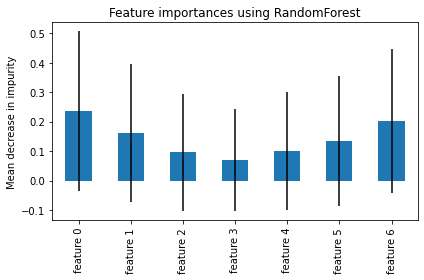

In [4]:
clf = Pipeline(
    [
        ("standard", StandardScaler()),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

def detection(file):      
    X = []
    y = []
    
    rows = file.shape[0]
    
    variables = file.loc[:, "Raw":"Echo_resp"]
    X = variables.to_numpy()
    type_attack = file.loc[:, "Type"]
    y = type_attack.to_numpy()
    
    feature_names = [f"feature {i}" for i in range(X.shape[1])]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf.fit(X_train, y_train)
    importances = clf.named_steps["classifier"].feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.named_steps["classifier"].estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using RandomForest")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    score = clf.predict(X_test)
    report = classification_report(y_test, score)
    print(report)
    
#detection(pd.read_csv('detection.csv'))
detection(df)